# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline 

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Loading the "Aldi" supermarket data

In [2]:
df_aldi = pd.read_csv("datasets/All_Data_Aldi.csv")
df_aldi.head()

,supermarket,prices_(£),prices_unit_(£),unit,names,date,category,own_brand
0,Aldi,0.69,2.9,l,Scentcerity Calming Zen Room Spray 240ml,20240228,household,False
1,Aldi,1.39,1.2,l,Almat So Soft Luxurious Fabric Conditioner- Li...,20240228,household,False
2,Aldi,1.39,1.1,l,Almat So Soft Fabric Conditioner - Clear Skies...,20240228,household,False
3,Aldi,1.39,1.1,l,Almat So Soft Fabric Conditioner - Pure & Gent...,20240228,household,False
4,Aldi,1.39,1.1,l,Almat So Soft Sunshine Fabric Conditioner 1.26l,20240228,household,False


# Modifying the column names and changing the format of the date column

In [3]:
# changing the name of the columns
df_aldi = df_aldi.rename(columns = {'prices_(£)' : 'prices_pounds' , 'prices_unit_(£)' : 'per_unit_price'})

In [4]:
# Correcting data types: Convert the 'date' column to datetime format
df_aldi['date'] = pd.to_datetime(df_aldi['date'], format='%Y%m%d')

In [5]:
print("The shape of the Aldi dataset is {}".format(df_aldi.shape))

The shape of the Aldi dataset is (240665, 8)


In [6]:
print("The column names in Aldi dataset - {}".format(df_aldi.columns))

The column names in Aldi dataset - Index(['supermarket', 'prices_pounds', 'per_unit_price', 'unit', 'names',
       'date', 'category', 'own_brand'],
      dtype='object')


# Information about the data

In [7]:
df_aldi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240665 entries, 0 to 240664
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   supermarket     240665 non-null  object        
 1   prices_pounds   240665 non-null  float64       
 2   per_unit_price  240661 non-null  float64       
 3   unit            240661 non-null  object        
 4   names           240665 non-null  object        
 5   date            240665 non-null  datetime64[ns]
 6   category        240665 non-null  object        
 7   own_brand       240665 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(4)
memory usage: 13.1+ MB


# Check for null values

In [8]:
df_aldi.isnull().sum()

supermarket       0
prices_pounds     0
per_unit_price    4
unit              4
names             0
date              0
category          0
own_brand         0
dtype: int64

In [9]:
# Checking which rows are null
aldi_null = df_aldi[df_aldi.isnull().any(axis=1)]
print(aldi_null)

       supermarket  prices_pounds  per_unit_price unit  \
113687        Aldi           0.65             NaN  NaN   
117875        Aldi           0.65             NaN  NaN   
231598        Aldi           0.65             NaN  NaN   
236964        Aldi           0.65             NaN  NaN   

                                                    names       date  \
113687  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-05   
117875  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-04   
231598  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-10   
236964  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-09   

         category  own_brand  
113687  household      False  
117875  household      False  
231598  household      False  
236964  household      False  


In [10]:
df_aldi.iloc[32546]

supermarket                                                    Aldi
prices_pounds                                                  1.39
per_unit_price                                                  1.2
unit                                                              l
names             Almat So Soft Gold Orchid Fabric Conditioner 1...
date                                            2024-02-22 00:00:00
category                                                  household
own_brand                                                     False
Name: 32546, dtype: object

In [11]:
rows_starting_with_saxon = df_aldi[df_aldi['names'].str.startswith('Saxon Biodegradable Toilet')]
print(rows_starting_with_saxon)

       supermarket  prices_pounds  per_unit_price unit  \
113687        Aldi           0.65             NaN  NaN   
117875        Aldi           0.65             NaN  NaN   
231598        Aldi           0.65             NaN  NaN   
236964        Aldi           0.65             NaN  NaN   

                                                    names       date  \
113687  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-05   
117875  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-04   
231598  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-10   
236964  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-09   

         category  own_brand  
113687  household      False  
117875  household      False  
231598  household      False  
236964  household      False  


## Dropping the null values

In [12]:
df_aldi.dropna(inplace = True)
print("\nChecking for null values:\n{}".format(df_aldi.isnull().sum()))


Checking for null values:
supermarket       0
prices_pounds     0
per_unit_price    0
unit              0
names             0
date              0
category          0
own_brand         0
dtype: int64


# Visualizations

## Line graph for price trends over time

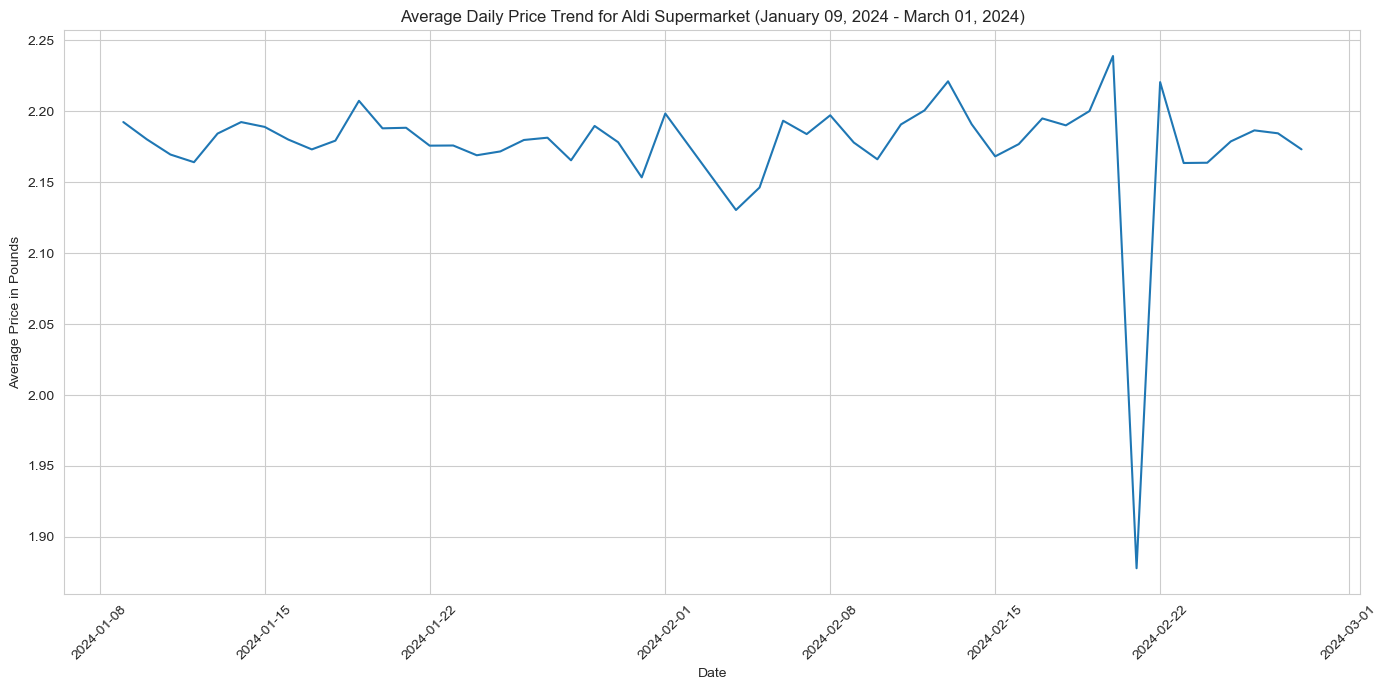

In [13]:
# Line graph
df_aldi['date'] = pd.to_datetime(df_aldi['date']) 
daily_price_trends_aldi = df_aldi.groupby(df_aldi['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize = (14, 7))
sns.lineplot(data = daily_price_trends_aldi, x = 'date', y = 'prices_pounds')
plt.title('Average Daily Price Trend for Aldi Supermarket (January 09, 2024 - March 01, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
plt.xticks(rotation = 45)
plt.tight_layout() 
plt.show()

The average daily price trends for `Aldi` supermarket has been increasing over the past few weeks. There is a slight upward trend in the graph, but the increase is not very substantial.

## Overall price distribution using a Histogram

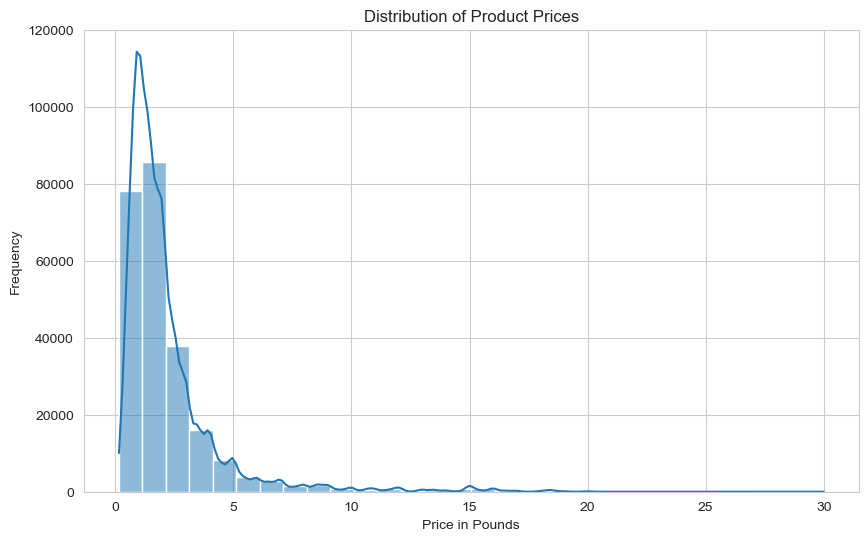

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Price Distribution using a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_aldi['prices_pounds'], 
             bins=30, 
             kde=True)

plt.title('Distribution of Product Prices')
plt.xlabel('Price in Pounds')
plt.ylabel('Frequency')
plt.show()

## Bar chart showing the number of products per category

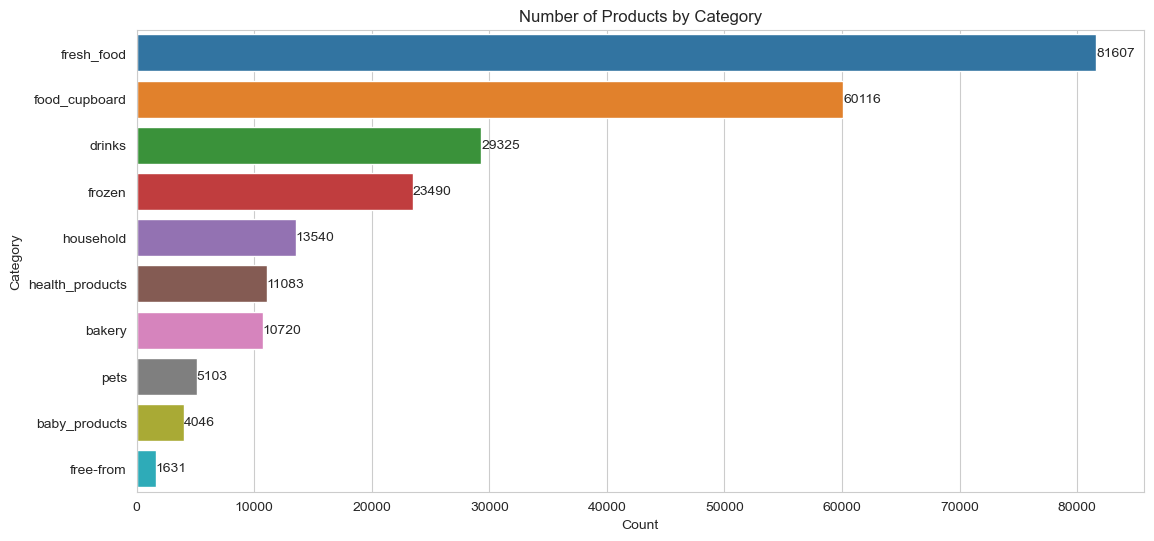

In [15]:
plt.figure(figsize=(13, 6))
sns.countplot(y = 'category', 
              data = df_aldi, 
              order = df_aldi['category'].value_counts().index)

plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')

# Adding annotations
for i, count in enumerate(df_aldi['category'].value_counts()):
    plt.text(count, i, str(count), ha='left', va='center')
    
plt.show()

From the above bar chart -
* `fresh_food` has the maximum number of products within the `Aldi` dataset.

## Calculating the average price per category

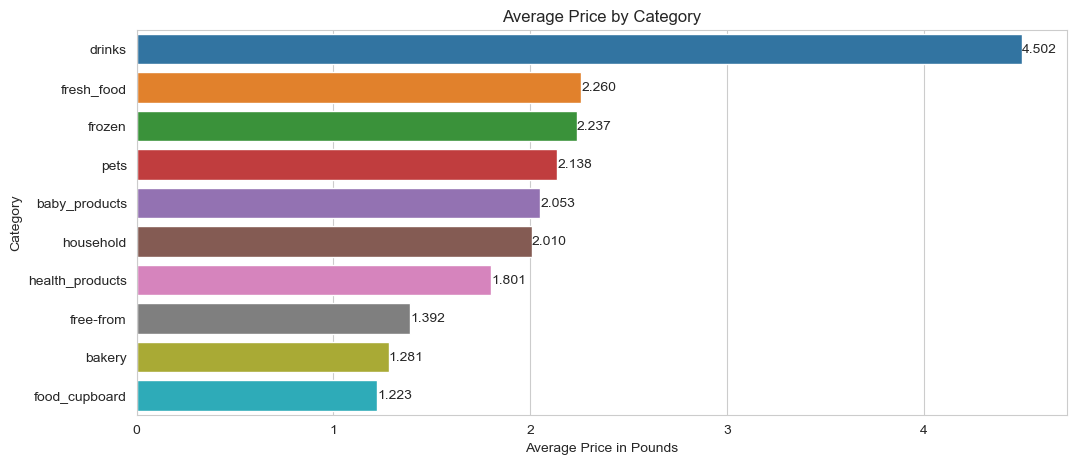

In [16]:
average_price_per_category = df_aldi.groupby('category')['prices_pounds'].mean().reset_index().sort_values(by='prices_pounds', ascending=False)

# Bar chart showing the average price per category
plt.figure(figsize=(12, 5))
sns.barplot(x='prices_pounds', y='category', data=average_price_per_category)
plt.title('Average Price by Category')
plt.xlabel('Average Price in Pounds')
plt.ylabel('Category')

# Adding annotations
for i, price in enumerate(average_price_per_category['prices_pounds']):
    plt.text(price, i, '{:.3f}'.format(price), ha='left', va='center')
    
plt.show()

From the above bar chart -
* We can conclude that the average price of `drinks` category is **higher** than any other category present, although `drinks` category does not have the maximum number of products.
* While the category `fresh_food` category contains the maximum number of products it is the **second** category with respect to average price by category.

## Box plot for distribution of prices for each product category

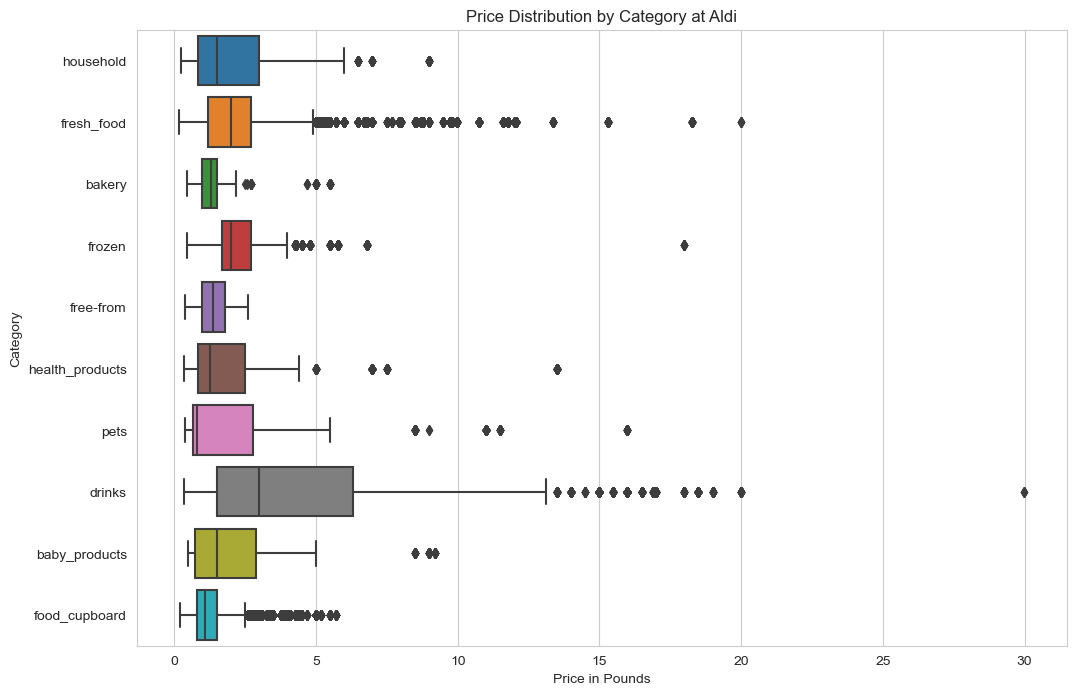

In [17]:
# Analyze the price distribution by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='prices_pounds', 
            y='category', 
            data=df_aldi)
plt.title('Price Distribution by Category at Aldi')
plt.xlabel('Price in Pounds')
plt.ylabel('Category')
#plt.xticks(rotation=45)
plt.show()

### Outliers: 
There are outliers in several categories, including `baby_products`, `bakery`, `drinks`, and `frozen`. These outliers represent prices that are significantly higher or lower than the rest of the data points in their respective categories.

## Pie chart for proportion of prices contributed by each product category

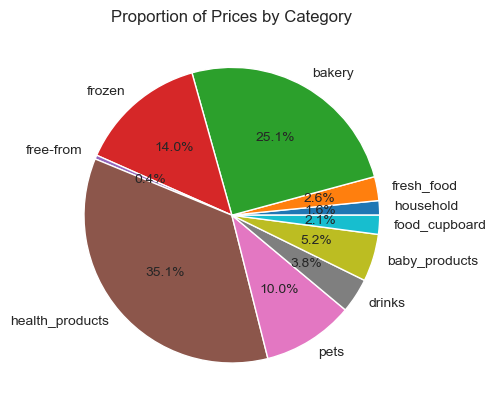

In [18]:
# Pie chart
plt.pie(df_aldi.groupby("category")["prices_pounds"].sum(), 
        labels = df_aldi["category"].unique(), 
        autopct = '%1.1f%%')

plt.title("Proportion of Prices by Category")

plt.show()

### From the pie chart -
* `drinks` has the highest number of products within `Aldi` supermarket with a total of 35.1%
* `food_cupboard` is the next highest category with 25.2% and so on

# Aldi Own Brand items count

In [19]:
aldi_ownBrand_value = df_aldi['own_brand'].value_counts()
print("\nNumber of items owned by Aldi and not owned by Aldi:\n{}".format(aldi_ownBrand_value))


Number of items owned by Aldi and not owned by Aldi:
own_brand
False    199643
True      41018
Name: count, dtype: int64


## Average Price Comparison: Own Brand vs. Non-Own Brand

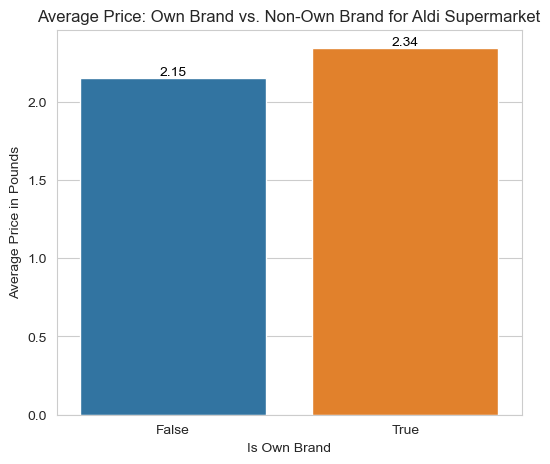

In [20]:
own_brand_prices_aldi = df_aldi.groupby('own_brand')['prices_pounds'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x = 'own_brand', 
            y = 'prices_pounds', 
            data=own_brand_prices_aldi)

plt.title('Average Price: Own Brand vs. Non-Own Brand for Aldi Supermarket')
plt.xlabel('Is Own Brand')
plt.ylabel('Average Price in Pounds')

# Displaying values on top of bars with a little gap
for index, row in own_brand_prices_aldi.iterrows():
    plt.text(index, row['prices_pounds'] + 0.02, round(row['prices_pounds'], 2), 
             color = 'black', 
             ha = "center")

plt.show()

# Correlation Matrix

In [21]:
df_aldi_corr = df_aldi[['date', 'prices_pounds']]

# Compute correlation matrix
correlation_matrix_aldi = df_aldi_corr.corr()

print("Correlation Matrix:")
print(correlation_matrix_aldi)

Correlation Matrix:
                   date  prices_pounds
date           1.000000       0.000594
prices_pounds  0.000594       1.000000


### Observations - 
* Based on the correlation coefficient, there is no meaningful linear relationship between the `date` and `prices_pounds` columns. In other words, the date of the observation does not have a significant impact on the prices in pounds.
* It's important to note that correlation coefficients only measure linear relationships, so there could still be other types of relationships (**nonlinear or time-dependent relationships**) that are not captured by this analysis.

# Different values present within `category`

In [22]:
aldi_category_value = df_aldi['category'].value_counts()
print("\nThe different values in category:\n{}".format(aldi_category_value))


The different values in category:
category
fresh_food         81607
food_cupboard      60116
drinks             29325
frozen             23490
household          13540
health_products    11083
bakery             10720
pets                5103
baby_products       4046
free-from           1631
Name: count, dtype: int64


# Re-categorizing

## For `drinks`

In [23]:
keywords_drinks = {
    'hot_beverages': ['hot', 'chocolate', 'coffee', 'cappuccino', 'espresso', 'tea', 'chai', 'cocoa'],
    
    'cold_beverages': ['water', 'soda', 'juice', 'iced', 'drink', 'cordial', 'smoothie', 'energy drink', 
                       'sugar', 'Coca-Cola', 'Diet Coke'],
    
    'alcoholic_beverages': ['wine', 'prosecco', 'sauvignon', 'malbec', 'cava', 'beer', 'cider', 
                            'stout', 'ale', 'lager'],
    
    'non_alcoholic_beverages': ['soft', 'non', 'alcoholic', 'kombucha', 'health'],
    
    'coffee_and_tea_related': ['coffee', 'beans', 'pods', 'ground', 'tea', 'bags', 'herbal']
}

# Ensure 'names' column is always treated as string
df_aldi['names'] = df_aldi['names'].astype(str)

# Function to assign drinks subcategory based on keywords using NLTK
def assign_drinks_subcategory_nltk(name):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Check tokens against keywords
    for category, kw_list in keywords_drinks.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_drinks'

# Apply the function to rows in the 'drinks' category
df_aldi.loc[df_aldi['category'] == 'drinks', 'category'] = df_aldi[df_aldi['category'] == 'drinks']['names'].apply(assign_drinks_subcategory_nltk)

# Save the updated DataFrame
df_aldi.to_csv('datasets/updated_All_Data_Aldi.csv', index=False)